# Imports

In [1]:
# For Structuring the Python code
%load_ext nb_black

# For reading and doing mathematical operation on the data
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()
%matplotlib inline

# Has no limit to display the number of columns
pd.set_option("display.max_columns", None)
# Sets the limit to display the number of rows
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

# Load Data

In [2]:
cdata = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the first two rows
cdata.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50


<IPython.core.display.Javascript object>

In [1030]:
# checking the shape of data
shape = cdata.shape
print(f"There are {shape[0]} rows and {shape[1]} columns in the dataset.")

There are 7253 rows and 14 columns in the dataset.


<IPython.core.display.Javascript object>

In [1031]:
# copying the dataset to another variable
data = cdata.copy()

<IPython.core.display.Javascript object>

In [1032]:
# checking the column names in the dataset
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<IPython.core.display.Javascript object>

In [1033]:
# general info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

**Observation**
1. The dependant variable is the price of the used car column and its dtype is float64.
2. Name, Location, Fuel_type, Owner_type, Transmission, Mileage, Engine and Power are all of object type.
3. S.no, Year and Kilometers_driven  are of int type.
4. Seats, New_Price are of float64 type.
5. There are missing values in Engine, Power, Seats and Price Columns.

# Duplicate values in data

In [1034]:
# checking for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observation**
1. There are no duplicate values in the data

# Checking for missing values

In [1035]:
# checking for missing values in the data
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Observation**
1. Price has the most number 1234, of missing values.
2. Power has 175 missing values.
3. Engine has 46 and Seats has 53 missing values.
4. Mileage has only  missing values.

# Statistical Summary of Data

In [1036]:
# Describes the statistical Summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


<IPython.core.display.Javascript object>

**Observations**<br>

 **Price Used cars**<br>
1. The range for price of used cars are between Rs 44,000 thousand to Rs 1,60,00,000.
2. 50% of used care Price is about Rs 5,64,000.
3. Average Price of used  car is about Rs 9,47,949.<br>
**New_Price cars**<br>
1. 50% of the new cars price is Rs 11,30,000.
2. Mean is about Rs 21,00,000.
3. Stiking difference between the price of the same model between used and new cars.<br>
**Kilometers**<br>
1. There are used cars with only 171kms driven which is almost like a new car.
2. the Max is about 65,00,000kms which is very high compared to mean and other statistics.
3. Average is about 58,699kms.


# Checking on Categorical columns (non-numeric)

In [1037]:
# Filtering the object datatypes
categorical = data.select_dtypes(exclude=["int64", "float64"]).columns
categorical

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

<IPython.core.display.Javascript object>

In [1038]:
for col_name in categorical:
    print(col_name)
    print(data[col_name].value_counts())
    print("\n\n")

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64



Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64



Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



Owner_Type
First            

<IPython.core.display.Javascript object>

**Observations**
1. Most of the used cars are Manual
2. Mumbai is the most highest manufacturing city
3. Mostly first owner cars are available
4. There are only 2 cars of fuel type electric
5. We need to make the Power, Engine, Mileage columns as  numeric values.

# Data Preprocessing

## Checking for missing values

In [1039]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

In [1040]:
# Dropping the S.no column
data.drop("S.No.", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1041]:
data.shape

(7253, 13)

<IPython.core.display.Javascript object>

# Dropping missing values in dependant variable Price since it is the target variable.

In [1042]:
data.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [1043]:
data.shape

(6019, 13)

<IPython.core.display.Javascript object>

In [1044]:
# Resetting the dataframe
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [1045]:
data.shape

(6019, 13)

<IPython.core.display.Javascript object>

In [1046]:
# checking the missing values in the remaining data
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

# Treating missing data in Column Mileage 

In [1047]:
data[data["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


<IPython.core.display.Javascript object>

In [1048]:
data[data["Fuel_Type"] == "Electric"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


<IPython.core.display.Javascript object>

**Observation**
1.  These are the only two rows with Fuel Type Electric we cannot delete the rows as we will loose information on    Electric cars. Hence we will fill them with median Mileage values.

## Checking the different units in the mileage column

In [1049]:
x = 0
y = 0
for val in data["Mileage"].values:
    if str(val).endswith("kmpl"):
        x += 1
    elif str(val).endswith("km/kg"):
        y += 1
print("kmpl values :", x)
print("km/kg values :", y)

kmpl values : 5951
km/kg values : 66


<IPython.core.display.Javascript object>

**Observation**
1. Since kmpl and km/kg are units associated with different types of fuel, but both the units refer to the distance covered (in km) per unit of fuel.We can keep remove the units and extract the numerical values alone.

## Extracting Mileage numeric value

In [7]:
# Function to convert Mileage to numerical value
def mileage_tonum(mil):
    """Return the numeric float value from
    a string by spliting
    with white space.
    """
    if isinstance(mil, str):
        val = mil.split(" ")
        return float(val[0])

<IPython.core.display.Javascript object>

In [8]:
# applying the mileage_tonum function
cdata["Mileage"] = cdata["Mileage"].apply(mileage_tonum)

<IPython.core.display.Javascript object>

## Checking distribution of Mileage Column

/Users/lakshmiprabharamesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


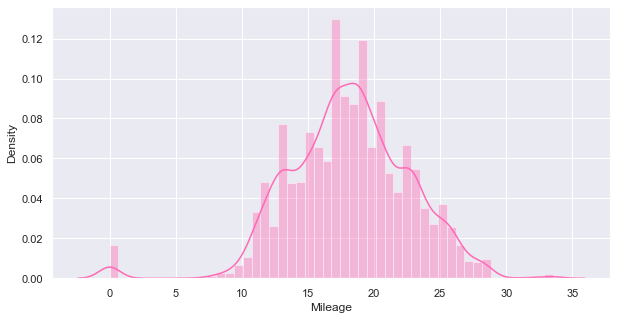

<IPython.core.display.Javascript object>

In [1052]:
# Visualizing the histogram of Mileage with kde
plt.figure(figsize=(10, 5))
sns.distplot(data["Mileage"], kde=True, color="hotpink")
plt.show()

**Observation**
1. This is an unskewed data distribution almost normal  and we can fill in the missing values with the **mean** of the data.

In [1053]:
# Statistical Summary of Mileage
data["Mileage"].describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

<IPython.core.display.Javascript object>

In [9]:
# Filling missing values with Mean
cdata["Mileage"].fillna(cdata["Mileage"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [1055]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,16.06,12.50


<IPython.core.display.Javascript object>

In [1056]:
# checking the missing values in the remaining data
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

 # Treating missing data in Engine Column

In [1057]:
# # Function to convert Engine to numerical value
def engine_tonum(eng):
    """
    Extracts a numerical float data from the string
    ending with "CC" and replaces
    it with empty space.
    """
    if isinstance(eng, str):
        if eng.endswith("CC"):
            return float(eng.replace("CC", " "))

<IPython.core.display.Javascript object>

In [1058]:
# Applying the function engine_to num
data["Engine"] = data["Engine"].apply(engine_tonum)

<IPython.core.display.Javascript object>

## Checking the distribution of Engine Column

/Users/lakshmiprabharamesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


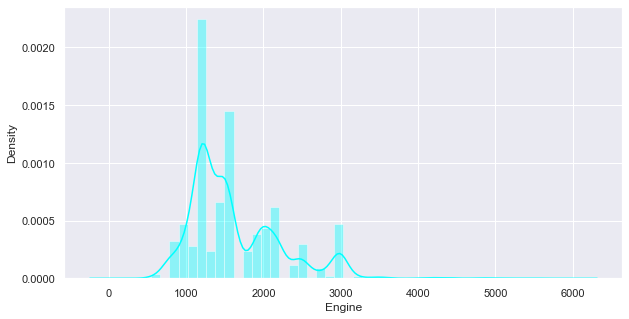

<IPython.core.display.Javascript object>

In [1059]:
# Visualizing the histogram of Engine with kde
plt.figure(figsize=(10, 5))
sns.distplot(data["Engine"], kde=True, color="cyan")
plt.show()

**Observation**
1. The data is right skewed and hence it is better to fill in the median values of the data.

In [1060]:
# Statistical Summary
data["Engine"].describe().T

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

<IPython.core.display.Javascript object>

In [1061]:
# Filling in the median values
data["Engine"].fillna(data["Engine"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [1062]:
data["Engine"].describe().T

count    6019.000000
mean     1620.509221
std       599.635458
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

<IPython.core.display.Javascript object>

In [1063]:
# Checking 2 samples of data o see the engine column
data.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
804,Maruti Swift Dzire VDI,Pune,2013,88000,Diesel,Manual,First,23.4,1248.0,74 bhp,5.0,7.880,4.75
2628,Hyundai Verna Transform SX VTVT,Bangalore,2011,61000,Petrol,Manual,Second,16.2,1599.0,103.2 bhp,5.0,14.255,3.40


<IPython.core.display.Javascript object>

In [1064]:
# checking the missing values in the remaining data
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

# Treating missing data in Power Column

In [1065]:
# # Function to convert Power to numerical value
def power_tonum(powr):
    """
    Extracts a numerical float data from the string
    ending with "bhp" and replaces
    it with empty space.
    """
    if isinstance(powr, str):
        if powr.endswith("bhp"):
            return float(powr.replace("bhp", " "))

<IPython.core.display.Javascript object>

In [1066]:
# Applying function power_tonum
data["Power"] = data["Power"].apply(power_tonum)

<IPython.core.display.Javascript object>

## Checking the distribution of Power

/Users/lakshmiprabharamesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


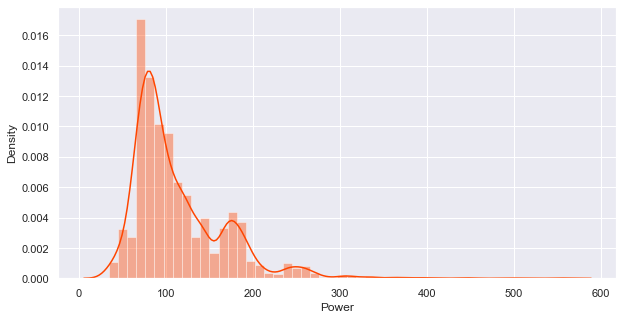

<IPython.core.display.Javascript object>

In [1067]:
# Visualizing the histogram of Power with kde
plt.figure(figsize=(10, 5))
sns.distplot(data["Power"], kde=True, color="orangered")
plt.show()

**Observation:**
1. The data is right skewed and it is better to fill in the missing values with the median of the Power data.

In [1068]:
# Statistical Summary of Power Column
data["Power"].describe().T

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

In [1069]:
# Filling the missing values with median of Power values
data["Power"].fillna(data["Power"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [1070]:
data["Power"].describe()

count    6019.000000
mean      112.883539
std        53.283701
min        34.200000
25%        78.000000
50%        97.700000
75%       138.030000
max       560.000000
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

In [1071]:
# Checking 2 sample values to see Power Column
data.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2169,Mahindra Scorpio SLE BSIII,Pune,2010,96813,Diesel,Manual,Second,12.05,2179.0,120.0,8.0,18.865,5.50
4376,Hyundai Xcent 1.2 Kappa S,Kochi,2017,38932,Petrol,Manual,First,19.10,1197.0,82.0,5.0,8.230,6.21


<IPython.core.display.Javascript object>

In [1072]:
# checking the missing values in the remaining data
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
New_Price             0
Price                 0
dtype: int64

<IPython.core.display.Javascript object>

# Treating missing data in Seats Column

## Checking Distribution of Seats Column

/Users/lakshmiprabharamesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


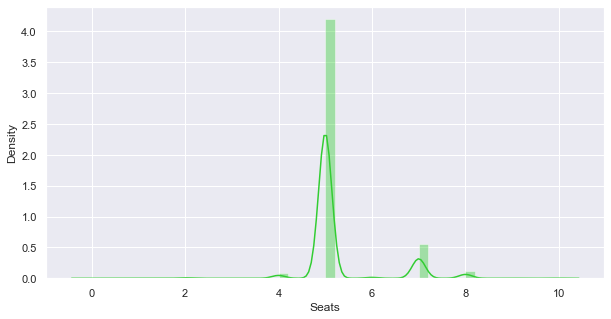

<IPython.core.display.Javascript object>

In [1073]:
plt.figure(figsize=(10, 5))
sns.distplot(data["Seats"], kde=True, color="limegreen")
# data["Engine"].hist(bins=50)
plt.show()

**Observation**
1. The data is unskewed and hence  we can replace the missing values with the mean.

In [1074]:
# Filling the missing data with the mean values
data["Seats"].fillna(data["Seats"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [1075]:
# Statistical summary of seat column
data.Seats.describe()

count    6019.000000
mean        5.278735
std         0.806012
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

<IPython.core.display.Javascript object>

In [1076]:
# Final Check of null values
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

**Observation**
1. We have treated all the missing values 

# Standarization 

## Mileage Column Z-Transformation

 Rescaling the data of Mileage so that the mean is 0 and standard deviation is 1

In [1077]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

<Figure size 720x432 with 0 Axes>

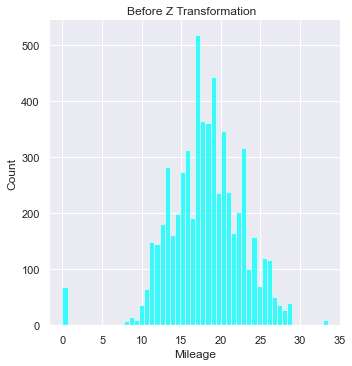

<Figure size 720x432 with 0 Axes>

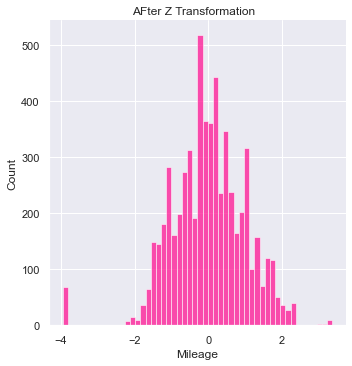

<IPython.core.display.Javascript object>

In [1078]:
plt.figure(figsize=(10,6))
sns.displot(data["Mileage"],color="aqua",kde=False)
plt.title("Before Z Transformation  ")
plt.show()

scaler = StandardScaler()
data["Mileage"] = scaler.fit_transform(data[["Mileage"]])

plt.figure(figsize=(10,6))
sns.displot(data["Mileage"],color="deeppink",kde=False)
plt.title("AFter Z Transformation  ")
plt.show()


**Observation**
1. For Mileage Column it is better to know the values as how many standard deviations from the mean the Mileage of the used car is. This would be done via a z-transformation.
1. The standard scaler assumes features are normally distributed and will scale them to have a mean 0 and standard deviation of 1. 

In [1079]:
# To see the z-transformed Mileage Column
data.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3789,Maruti S Cross DDiS 200 Alpha,Ahmedabad,2016,58000,Diesel,Manual,First,1.203856,1248.0,88.50,5.0,7.88,7.90
5879,Mitsubishi Pajero Sport 4X4,Jaipur,2014,70000,Diesel,Manual,Second,-1.011747,2477.0,175.56,7.0,33.21,11.85


<IPython.core.display.Javascript object>

# Log Transformations

Treating the skewness on positive non null data

<Figure size 720x360 with 0 Axes>

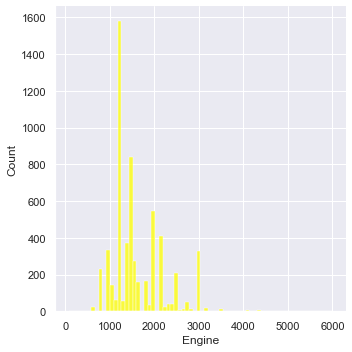

<Figure size 720x360 with 0 Axes>

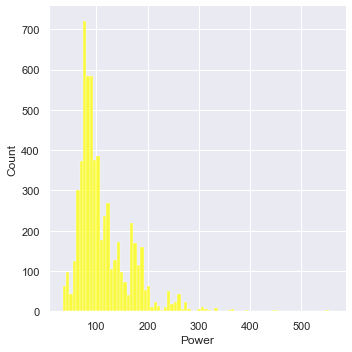

<Figure size 720x360 with 0 Axes>

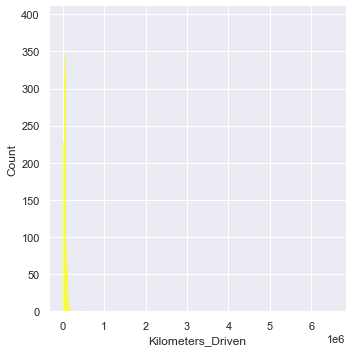

<IPython.core.display.Javascript object>

In [1080]:
# Distribution of the col_to_log values
col_to_log = ["Engine", "Power", "Kilometers_Driven"]

for col in col_to_log:
    plt.figure(figsize=(10, 5))
    sns.displot(data[col], color="yellow")
    plt.show()

**Observation**
1. Features like Power and Engine are right skewed and will likely behave better on the log scale.
2. Kilometers _Driven is heavily right skewed.

## Log Distribution of Power and Engine

<Figure size 720x432 with 0 Axes>

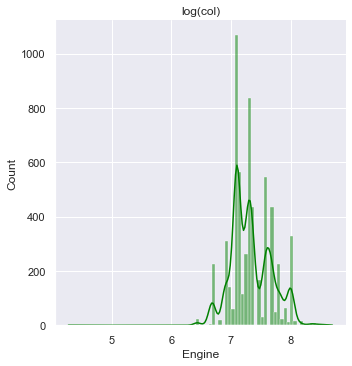

<Figure size 720x432 with 0 Axes>

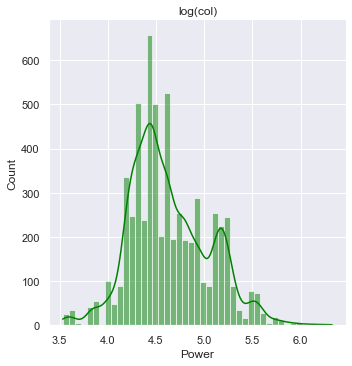

<Figure size 720x432 with 0 Axes>

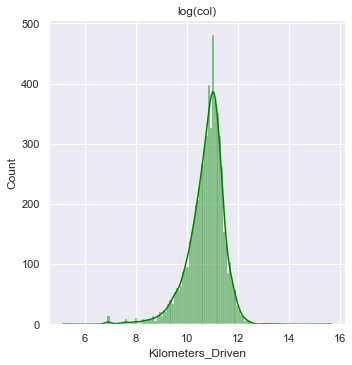

<IPython.core.display.Javascript object>

In [1081]:
#Distribution of log of the col_to_log
for col in col_to_log:
    plt.figure(figsize=(10,6))
    sns.displot(np.log(data[col]), color="green",kde=True)
    plt.title('log(col)')
    plt.show()
    


**Observations**
1. The log transformation has helped.
2. Engine is still a bit skewed.
3. Power has reached a better distribution close to normal.
4. Kilometers_driven has now a distribution almost normal.

In [1082]:
# Changing the feature values  to log values
for col in col_to_log:
    data[col + "_log"] = np.log(data[col])

<IPython.core.display.Javascript object>

In [1083]:
# Dropping vales of col_to_log
data.drop(col_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1084]:
# Checking the transformations
data.sample(3)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Price,Engine_log,Power_log,Kilometers_Driven_log
5717,Maruti Wagon R LXI BS IV,Kolkata,2015,Petrol,Manual,First,0.518438,5.0,5.51,3.10,6.905753,4.205289,10.503093
3896,Maruti Swift Dzire VDi,Hyderabad,2010,Diesel,Manual,First,0.254312,5.0,7.88,3.85,7.129298,4.302713,11.775290
4452,Toyota Innova Crysta 2.8 GX AT,Kochi,2019,Diesel,Automatic,First,-1.478879,7.0,20.74,19.40,7.921173,5.144583,9.552226


<IPython.core.display.Javascript object>

In [1085]:
data.describe()

,Year,Mileage,Seats,New_Price,Price,Engine_log,Power_log,Kilometers_Driven_log
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,-2.590459e-16,5.278735,21.499855,9.479468,7.330726,4.636217,10.758780
std,3.269742,1.000083e+00,0.806012,24.332922,11.187917,0.339275,0.411565,0.715788
min,1998.000000,-3.958607e+00,0.000000,3.910000,0.440000,4.276666,3.532226,5.141664
25%,2011.000000,-6.472093e-01,5.000000,7.880000,3.500000,7.088409,4.356709,10.434116
50%,2014.000000,3.282815e-03,5.000000,11.300000,5.640000,7.308543,4.581902,10.878047
75%,2016.000000,6.472263e-01,5.000000,21.770000,9.950000,7.585281,4.927471,11.198215
max,2019.000000,3.362703e+00,10.000000,375.000000,160.000000,8.699181,6.327937,15.687313


<IPython.core.display.Javascript object>

# Data Preprocessing on Categorical Columns

#### Changing  Year to categorical type

In [1086]:
# Changing Year as Categorical Variable
data["Year"] = data["Year"].astype("category")

<IPython.core.display.Javascript object>

In [1087]:
# Filtering the object datatypes after many transformations
categorical_new = data.select_dtypes(exclude=["int64", "float64"]).columns
categorical_new

Index(['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

<IPython.core.display.Javascript object>

In [1088]:
# checking for value counts in Categorical data
for col_name in categorical_new:
    print(col_name)
    print(data[col_name].value_counts())
    print("\n\n")

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64



Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64



Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64



Fuel_Type
Diesel     

<IPython.core.display.Javascript object>

## Treating the Name column

In [1089]:
data["Name"].sample(3)

2326       Hyundai Elantra 2.0 SX Option AT
52                    Maruti Swift Ldi BSIV
928     Skoda Fabia 1.2 MPI Ambiente Petrol
Name: Name, dtype: object

<IPython.core.display.Javascript object>

In [1090]:
# Using split to derive the brand details from data
brands = data["Name"].str.split(" ", expand=True)

<IPython.core.display.Javascript object>

In [1091]:
# checking for brands names alone
brands.sample(4)

,0,1,2,3,4,5,6,7,8,9
2548,Chevrolet,Beat,LT,None,None,None,None,None,None,None
2982,Hyundai,Creta,1.6,SX,Plus,Petrol,Automatic,None,None,None
2246,Volkswagen,Vento,Diesel,Highline,None,None,None,None,None,None
3614,Maruti,SX4,Vxi,BSIV,None,None,None,None,None,None


<IPython.core.display.Javascript object>

In [1092]:
# setting brand names to a new column in data
data["Brand"] = brands[0]
data["Brand"].shape

(6019,)

<IPython.core.display.Javascript object>

In [1093]:
# checking total number of unique brands
data["Brand"].nunique()

31

<IPython.core.display.Javascript object>

In [1094]:
# assigning the brands count to a variable
brand_count = data["Brand"].value_counts()

<IPython.core.display.Javascript object>

In [1095]:
# setting a threshold value to get only most frequent brands in data
threshold = 90
brand_count[brand_count.values >= threshold]

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Name: Brand, dtype: int64

<IPython.core.display.Javascript object>

**Observation**
1. 90 looks to be a good threshold.
2. We will keep only those brands that have more than 90 cars into consideration, and the rest we will assign as 'Others'.
3. We can experiment by using a different threshold.

In [1096]:
# getting all the brands as a list
brand_list = brand_count[brand_count.values >= threshold].index.to_list()
print(brand_list)

['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW', 'Audi', 'Tata', 'Skoda', 'Renault', 'Chevrolet', 'Nissan']


<IPython.core.display.Javascript object>

In [1097]:
#updating the brand considered on the dataset
brand_val=[]

for i in range(data.shape[0]):# iterate over the rows in the dataset
    val = data["Brand"].values[i] # getting values of the Brand column
    flag=0 # flag variable
    for item in brand_list: #iterate over the brand list considered finally
        if item in val and flag == 0: #check if brand name in row
            brand_val.append(item)
            flag=1
    if flag == 0: # if row value is different from the list of brands considered
        brand_val.append("Others")

# we will assign the list values to a new column
data["Brand_Names"]=   brand_val     


<IPython.core.display.Javascript object>

In [1098]:
# Dropping the name and brand column
data.drop(["Name", "Brand"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1099]:
# checking the dataset
data.sample(2)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Price,Engine_log,Power_log,Kilometers_Driven_log,Brand_Names
1978,Mumbai,2015,Petrol,Manual,First,0.566461,5.0,11.11,5.95,7.224753,4.511958,10.484865,Maruti
2745,Kochi,2017,Diesel,Manual,First,1.345741,5.0,11.12,9.13,7.129298,4.483003,10.556490,Maruti


<IPython.core.display.Javascript object>

# Treating the Year Column

In [1100]:
# assigning the Years count to a variable
Year_count = data["Year"].value_counts()

<IPython.core.display.Javascript object>

In [1101]:
# setting a threshold value to get only most frequent year in data
threshold_year = 100
year_considered = Year_count[Year_count.values >= threshold_year]


<IPython.core.display.Javascript object>

In [1102]:
# getting all the years considered as a list
year_list = year_considered.index.to_list()
year_list

[2014, 2015, 2016, 2013, 2017, 2012, 2011, 2010, 2018, 2009, 2008, 2007, 2019]

<IPython.core.display.Javascript object>

In [1103]:
# updating the year considered on the dataset
year_val = []

for items in range(data.shape[0]):  # iterate over the rows in the dataset
    tex = data["Year"].values[items]  # getting values of the Year column
    flag = 0
    for i in year_list:  # iterate over the year list considered finally
        if i == tex and flag == 0:  # check if year name in row
            year_val.append(i)
            flag = 1
    if flag == 0:  # if row value is different from the list of year considered
        year_val.append("Others")

<IPython.core.display.Javascript object>

In [1104]:
# Converting the values in list year_val to string
year_val_string = []
for i in year_val:
    val = str(i)
    year_val_string.append(val)


<IPython.core.display.Javascript object>

In [1105]:
# Adding new column year_new to the dataset
data["Year_new"] = year_val_string
data.sample(3)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Price,Engine_log,Power_log,Kilometers_Driven_log,Brand_Names,Year_new
5542,Kochi,2017,Diesel,Automatic,First,-1.478879,7.0,20.74,18.36,7.921173,5.144583,9.942179,Toyota,2017
2920,Mumbai,2017,Diesel,Manual,First,-0.972455,7.0,23.06,17.65,7.780303,4.995860,10.545341,Toyota,2017
5348,Chennai,2012,Diesel,Automatic,Third,-0.671221,5.0,48.18,10.00,7.598399,5.176150,11.652687,BMW,2012


<IPython.core.display.Javascript object>

In [1106]:
# dropping old year column
data.drop("Year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1107]:
# checking the dataset
data.sample()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Price,Engine_log,Power_log,Kilometers_Driven_log,Brand_Names,Year_new
1711,Kolkata,Petrol,Manual,First,-1.077233,5.0,10.25,0.9,7.309881,4.543295,10.718852,Hyundai,Others


<IPython.core.display.Javascript object>

# OUTLIER Analysis

## Kilometers Driven

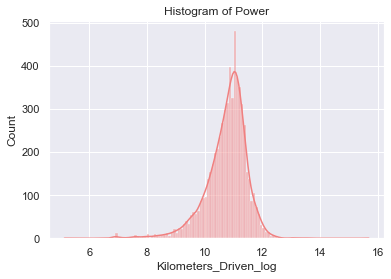

/Users/lakshmiprabharamesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


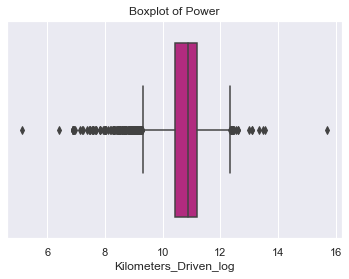

<IPython.core.display.Javascript object>

In [1108]:
# Drawing histplot to see distribution
sns.histplot(data["Kilometers_Driven_log"], color="lightcoral", kde=True)
plt.title("Histogram of Power")
plt.show()
# Drawing box to see outliers
sns.boxplot(data["Kilometers_Driven_log"], color="mediumvioletred")
plt.title("Boxplot of Power")
plt.show()

**Observations**
1. `Kilometers_Driven_log` has a lot of values that are flagged as suspicious/outliers by the boxplot, but in the histogram we can see that the distribution is little skewed so these points aren't inconsistent with the overall distribution of the data. 
2. Having a heavy tail means we might want to consider statistics less sensitive to large values. 
   The median may be chosen as central tendancy for better results in this case.

## Outlier detection using IQR method

In [1109]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Kilometers_Driven_log"][data["Kilometers_Driven_log"].notnull()], [0.25, 0.75]
)
kilo_driven_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {kilo_driven_4iqr}")
# getting the values
outlier_kilo_driven_4iqr = data.loc[
    np.abs(data["Kilometers_Driven_log"] - data["Kilometers_Driven_log"].median())
    > power_4iqr,
    "Kilometers_Driven_log",
]
outlier_kilo_driven_4iqr.nunique()

Q1 = 10.4341158035983, Q3 = 11.198214720130528, 4*IQR = 3.056395666128914


19

<IPython.core.display.Javascript object>

**Observation**
1. There are 19 values as outliers beyod 4 itmes the IQR but it is better we not consider them as outliers as Kilometers_Driven_log is an important column to take into consideration for determining the price of a used cars and hence we will need all the data

## tmean outlier check

In [1110]:
Kilometers_Driven_log_1 = data['Kilometers_Driven_log'][data['Kilometers_Driven_log'].notnull()]
# importing tmean
from scipy.stats import tmean
# tmean removing tails of the data
print(tmean(Kilometers_Driven_log_1, limits=np.quantile(Kilometers_Driven_log_1, [.1, .9])))
# tmean within limits
print(tmean(Kilometers_Driven_log_1, limits=[0,20]))


10.821481714123426
10.758779627533348


<IPython.core.display.Javascript object>

**Observation**
1. the tmean shows the mean of data within limts and data after removing the outlier tails.
2. Both mean values seem similar 

Hence we can decide not to remove the outliers as they will have valuable information in them.

# Data Visualization

## Univariate analysis - Numerical Variable

In [5]:
# the fucntion helps us to plot a histogram and a boxplot of all the numerical data
def hist_box_plot(data, feature, kde=False, bins=None, figsize=(12, 7)):
    """
    Returns a histogram and a box plot
    data= data
    features = column
    kde = True/False if we need the density curve
    bin= no of bins for histogram
    fgsize= size of the figure(default 12,7)"""

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # rows for the subplot
        sharex=True,  # all the subplots ahre same x asix
        figsize=figsize,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
    )  # 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # a boxplot where the mean is indicated with a star
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, color="hotpink", kde=kde, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, ax=ax_hist2, color="mediumslateblue", kde=kde
    )  # plots a histogram
    ax_hist2.axvline(
        data[feature].mean(), linestyle="--", color="green"
    )  # adding mean to histogram
    ax_hist2.axvline(
        data[feature].median(), linestyle="-", color="blue"
    )  # adding median to histogram

<IPython.core.display.Javascript object>

### Price - Target Variable

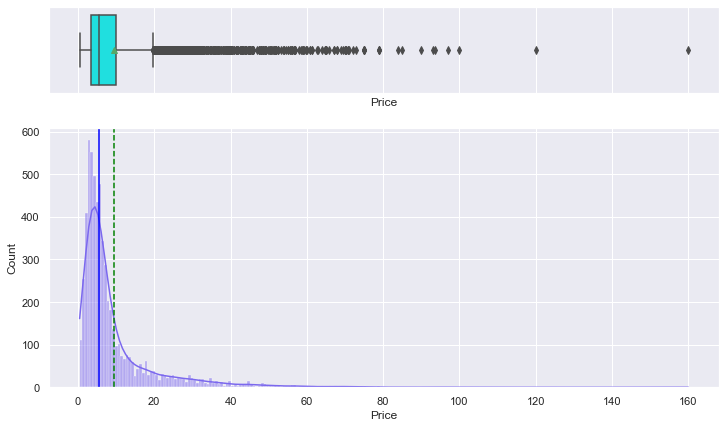

<IPython.core.display.Javascript object>

In [1112]:
hist_box_plot(data, "Price", kde=True)

**Observation**
1. The Price is heavly right skewed with a mean 9.47

### Engine Log

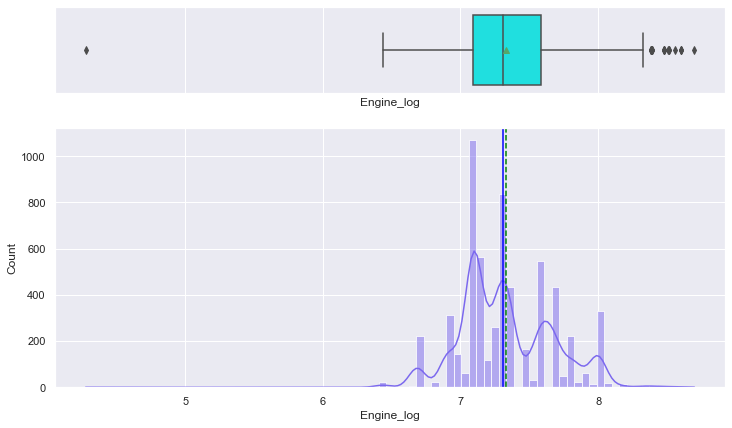

<IPython.core.display.Javascript object>

In [1113]:
hist_box_plot(data, "Engine_log", kde=True)

**Observation**
1. The Engine log is not close normal but a liitle normally distributed.

### Power Log

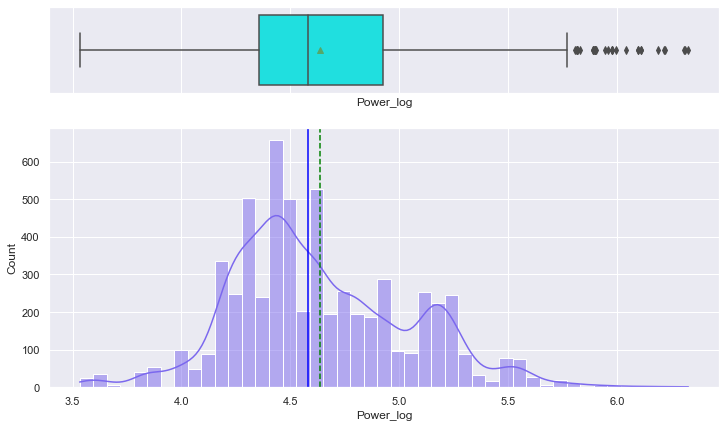

<IPython.core.display.Javascript object>

In [1114]:
hist_box_plot(data, "Power_log", kde=True)

**Observation**
1. As we have seen in the above section the distribution before log transformation is right skewed. 
   Now the distribution after  log transformation is almost close to normal

### Kilometers_Driven_log

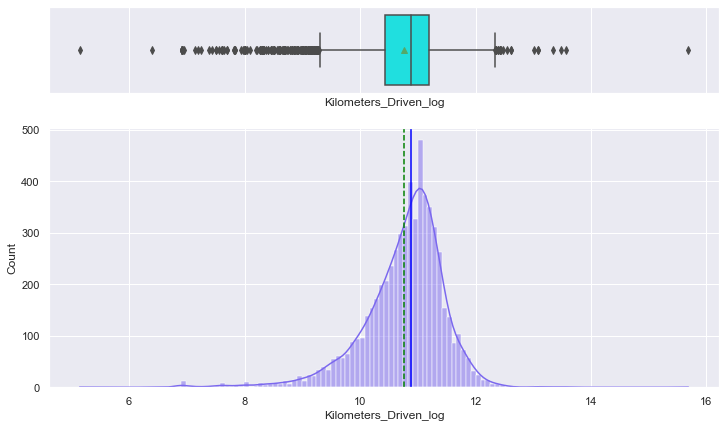

<IPython.core.display.Javascript object>

In [1115]:
hist_box_plot(data, "Kilometers_Driven_log", kde=True)

**Observation**
1. As we have seen in the above section the distribution before log transformation is right skewed. 
   Now the distribution after  log transformation for Kilometers_Driven_log is  close to normal

### New Price

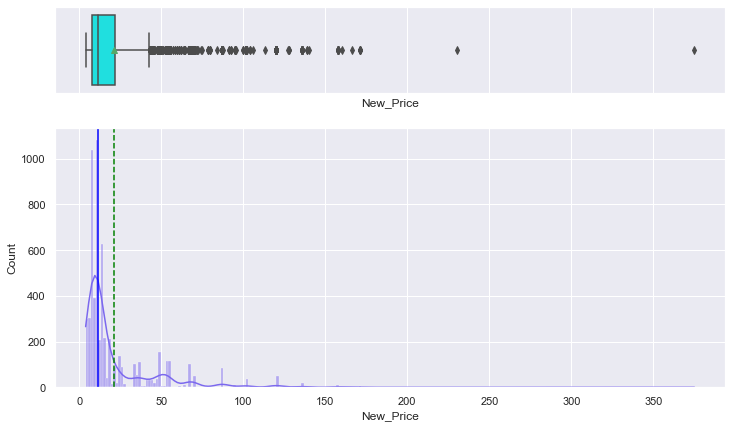

<IPython.core.display.Javascript object>

In [1116]:
hist_box_plot(data, "New_Price", kde=True)

**Observation**
1. The distribution is right skewed with a mean of 21.

### Seats Distribution

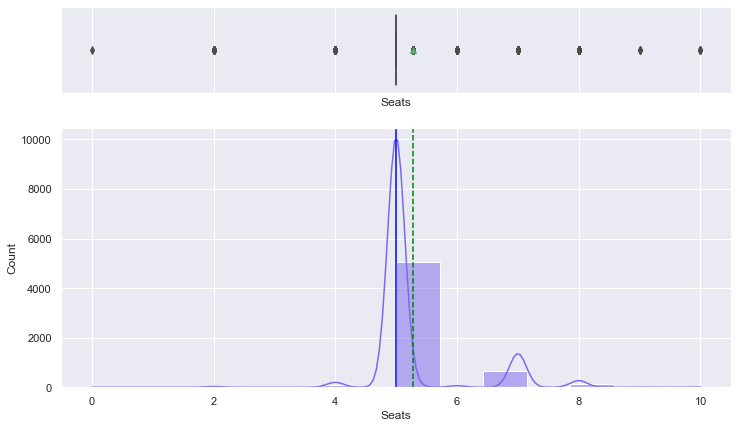

<IPython.core.display.Javascript object>

In [1117]:
hist_box_plot(data, "Seats", kde=True)

**Observation**
1. The distribution is normal with a mean of 5.

### Mileage Distribution

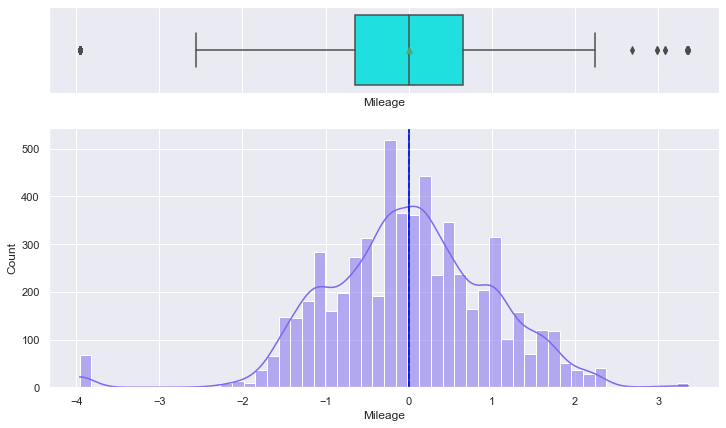

<IPython.core.display.Javascript object>

In [1118]:
hist_box_plot(data, "Mileage", kde=True)

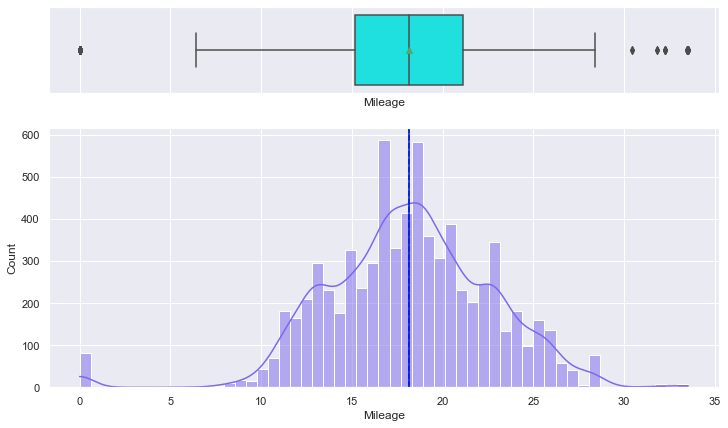

<IPython.core.display.Javascript object>

In [10]:
hist_box_plot(cdata, "Mileage", kde=True)

**Observations**
1. After z transformation The distribution is normal with a mean of 0 and standard deviation of 1.

# Variable Transformation for Numerical Variables

## Log Transformations for Price and New_price columns

#### Distributions of the numerical columns

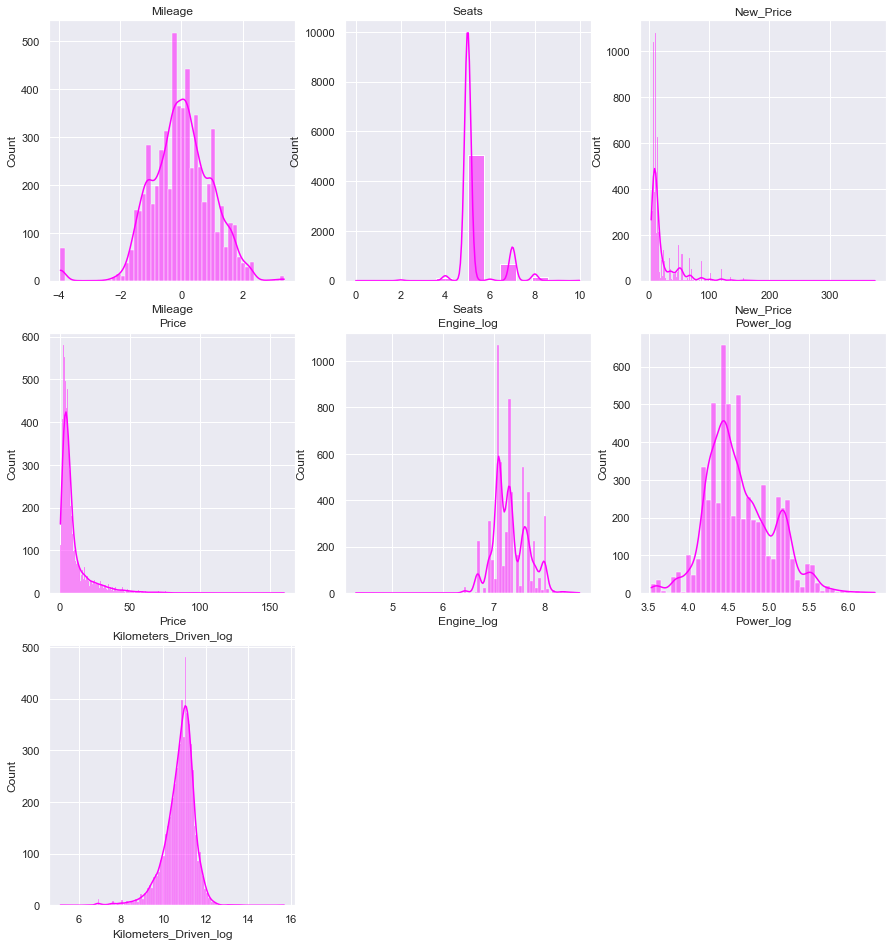

<IPython.core.display.Javascript object>

In [1119]:
# creating a list with numerical columns 
num_cols = [item for item in data.select_dtypes(include=np.number).columns]
plt.figure(figsize=(15,45))
 
for i in range(len(num_cols)):
    plt.subplot(8,3,i+1)#subplots with 3 columns
    sns.histplot(data=data,x=num_cols[i],kde=True,color="fuchsia")#creating a histogram for all the columns
    plt.title(num_cols[i])
    
plt.show()


**Observations**
1. From the Price histogram we can see the skewness and hence we can take log for the same.
2. From the Price_New histogram we can see the skewness and hence we can take log for the same.

### Log Transformations for Price and New_price columns

In [1120]:
# log transformations columns in list
columns_to_log = ["Price", "New_Price"]
# converting into log values
for i in columns_to_log:
    data[i + "_log"] = np.log(data[i] + 1)

<IPython.core.display.Javascript object>

In [1121]:
# Dropping the columns_to_log columns
data.drop(columns_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1122]:
# checking the data with new columns_to_log values
data.sample(2)

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Engine_log,Power_log,Kilometers_Driven_log,Brand_Names,Year_new,Price_log,New_Price_log
3345,Kolkata,Diesel,Manual,First,0.821855,5.0,7.241366,4.499810,10.552604,Hyundai,2011,1.223775,2.420368
3884,Chennai,Petrol,Manual,First,0.066586,5.0,7.088409,4.317488,10.308953,Nissan,2013,1.446919,2.348514


<IPython.core.display.Javascript object>

### Distribution of  Log Transformations for Price and New_price columns

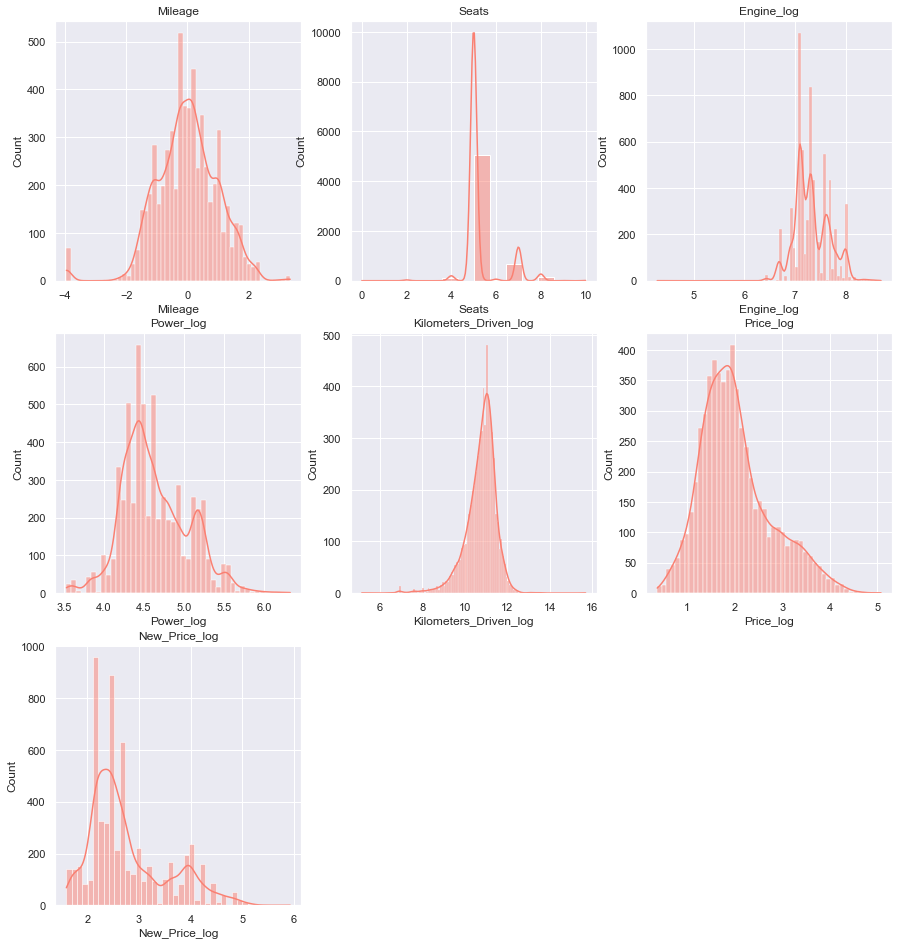

<IPython.core.display.Javascript object>

In [1123]:
num_cols = [item for item in data.select_dtypes(include=np.number).columns]
plt.figure(figsize=(15,45))

for i in range(len(num_cols)):
    plt.subplot(8,3,i+1)
    #plt.hist(data[num_cols[i]])
    sns.histplot(data=data,x=num_cols[i],kde=True,color="salmon")
    plt.title(num_cols[i])
    
plt.show()


**Observation**
1.Now both Price_log and New_price_log distribution is normal and almost normal respectively

## Univariate Data visualization- Categorical Variables

In [1124]:
# To create a barplot with percentage on top of each
def labeled_bar(data, feature, perc=False, n=None):
    """
    Returns a Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = data[feature].shape[0]  # total values of the columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature]
        .value_counts()
        .index[:n]
        .sort_values(),  # create a count plot
    )

    for p in ax.patches:#loops through each patch
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage for each division of the category
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  # width  of plot
        y = p.get_height()  # height of plot

        ax.annotate(
            label,
            (x, y),
            size=12,
            xytext=(0, 5),
            ha="center",
            va="center",
            textcoords="offset points",
        )  # anotate the percentages

    plt.show()  # Finally show the plot

<IPython.core.display.Javascript object>

## Location

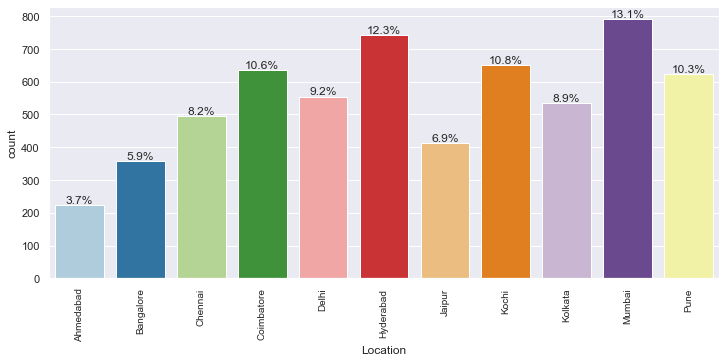

<IPython.core.display.Javascript object>

In [1125]:
labeled_bar(data, "Location", perc=True)

**Observation**
1. 13% of cars are sold in Mumbai and 12.3% of used cars are sold in Hyderabad which  are the cities where most number of cars are sold or available for purchase.
2. Ahmedabad is the city with only 3.7% of used cars are available or are being sold which is the least.

## Year

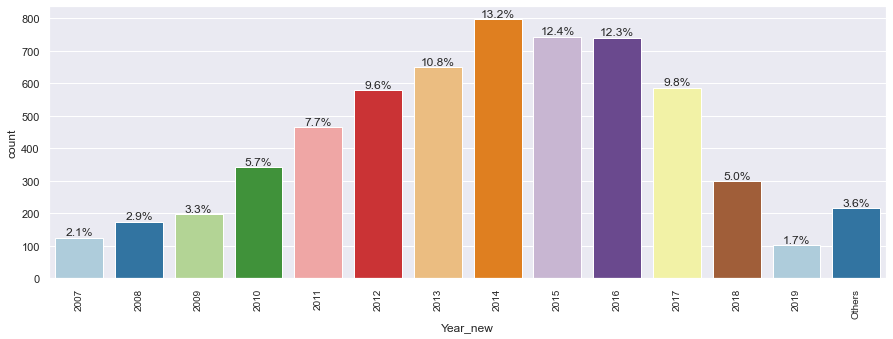

<IPython.core.display.Javascript object>

In [1126]:
labeled_bar(data, "Year_new", perc=True)

**Observations**
1. 2014 is when most of the used cars about 13.2% were manufactured.
2. 2019 is when least used cars available or sold were least manufactured.

## Fuel Type

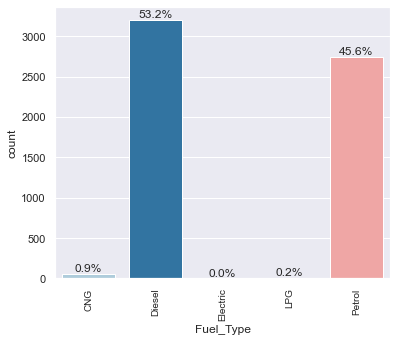

<IPython.core.display.Javascript object>

In [1127]:
labeled_bar(data, "Fuel_Type", perc=True)

**Observations**
1. About more than half the number of used cars are of diesel Fuel Type.
2. And about 45% of used cars are of Petrol Fuel Type.
3. There are hardly any LPG, CNG and Electric Fuel type cars.

## Tramsmission

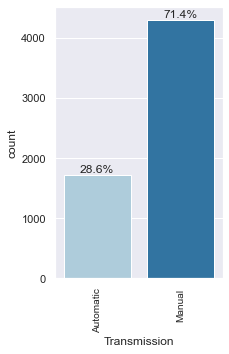

<IPython.core.display.Javascript object>

In [1128]:
labeled_bar(data, "Transmission", perc=True)

**Observations**
1. About 70% of used cars are use Manual Transmission.
2. And about 28% of used cars use atomatic.

## Owner Type

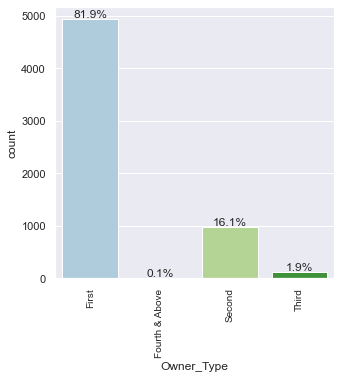

<IPython.core.display.Javascript object>

In [1129]:
labeled_bar(data, "Owner_Type", perc=True)

**Observations**
1. It is interesting to note that almost 80% of used cars are of First owner type.
2. And about 16% of used cars are second owner type.

## Brand names

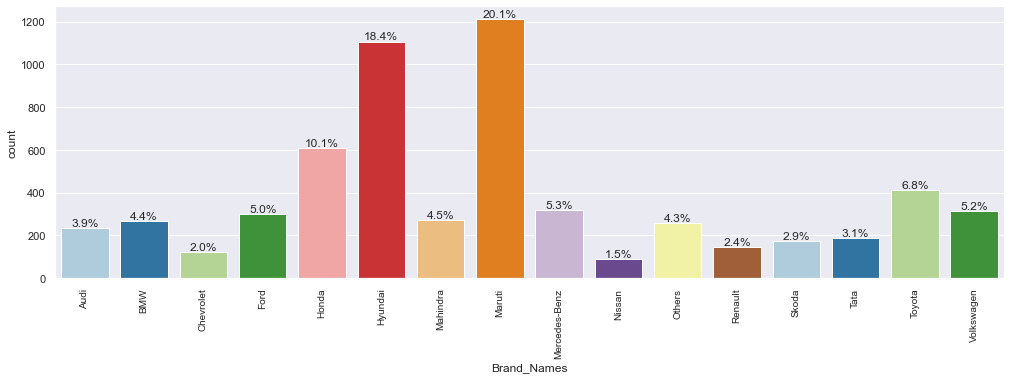

<IPython.core.display.Javascript object>

In [1130]:
labeled_bar(data, "Brand_Names", perc=True)

**Observations**
1. About 18%-20% of the used cars market consists of Hyundai or Maruti brands.
2. Honda 10% of used cars and Toyota 6.8% of used cars.
3. All other brands have a market between 1-5%

# Bivariate Analysis

## Pairplot

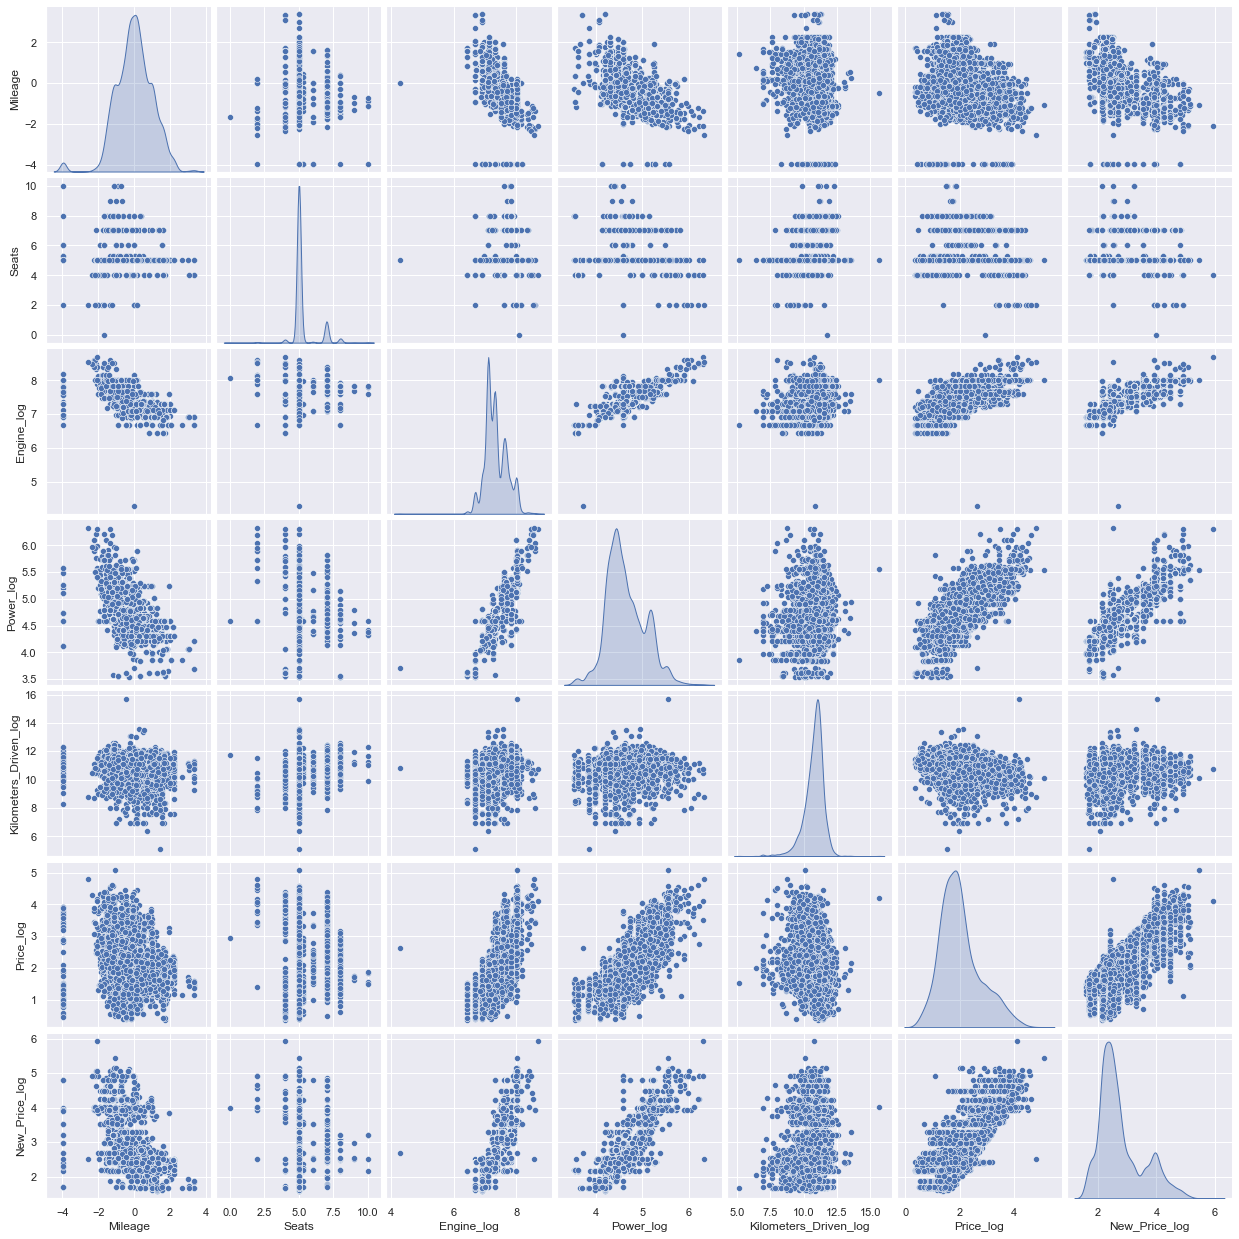

<IPython.core.display.Javascript object>

In [1131]:
# pairplot to show the relationships of all the variables
sns.pairplot(data, palette="Paired", diag_kind="kde")
plt.show()

**Observations**
1. Shows the pair plot for understanding the relationships of all the variables.

## Heat Map

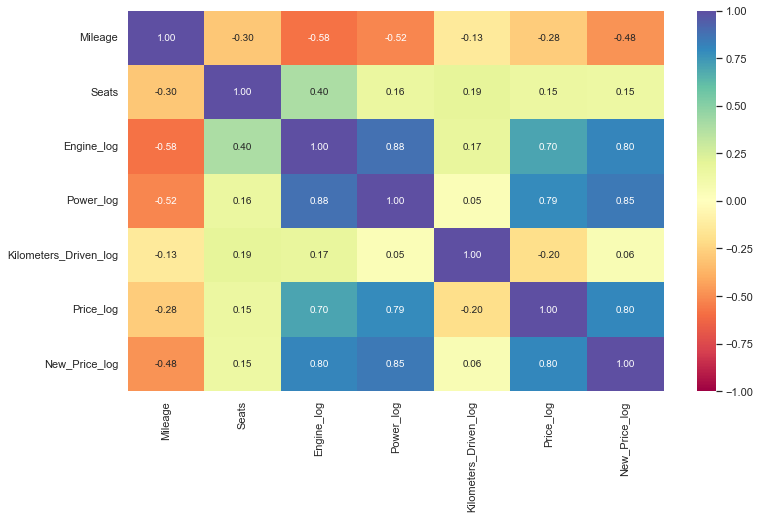

<IPython.core.display.Javascript object>

In [1132]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**
1. Price is highly positively correlated with New_price, Power, Engine
2. Price is negatively correlated with Kilometers_driven and Mileage.
3. Mileage is negatively correlated with all variables.
4. Engine and Power are highly positively correlated. 
5. New_Price is positively correlated with Engine and Power.

## How does the price vary across the different Locations where the used cars are available or sold 

In [1133]:
data.groupby("Location")["Price_log"].mean().sort_values(ascending=False)

Location
Coimbatore    2.452972
Bangalore     2.300559
Kochi         2.218509
Delhi         2.052965
Mumbai        2.051505
Hyderabad     2.047708
Ahmedabad     2.009618
Chennai       1.844089
Pune          1.764141
Jaipur        1.680964
Kolkata       1.665200
Name: Price_log, dtype: float64

<IPython.core.display.Javascript object>

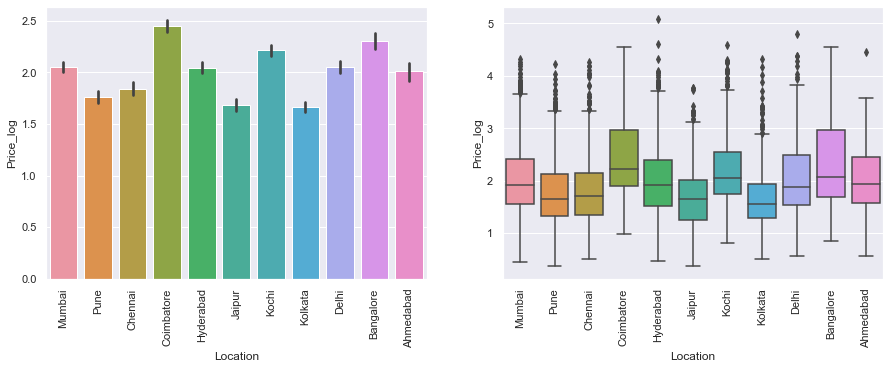

<IPython.core.display.Javascript object>

In [1134]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Price_log", x="Location")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price_log", x="Location")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. The used cars available or sold in Mumbai, Hyderabad, Delhi, Ahmedabad are slightly higher priced.
2. The used cars available or sold Coimbatore,Bangalore and Kochi are the highest priced.
3. The used cars available or sold in Kolkata, Jaipur, Pune are  least priced.
4. The used cars available or sold in Chennai are  moderately priced.

## How does the price vary across the different year of manufacturing?

In [1135]:
data.groupby("Year_new")["Price_log"].mean().sort_values(ascending=False)

Year_new
2019      2.698656
2018      2.511446
2017      2.400267
2016      2.259060
2015      2.206001
2014      2.108279
2013      2.009452
2012      1.879795
2011      1.788338
2010      1.615345
2009      1.606049
2008      1.400571
2007      1.261413
Others    1.023893
Name: Price_log, dtype: float64

<IPython.core.display.Javascript object>

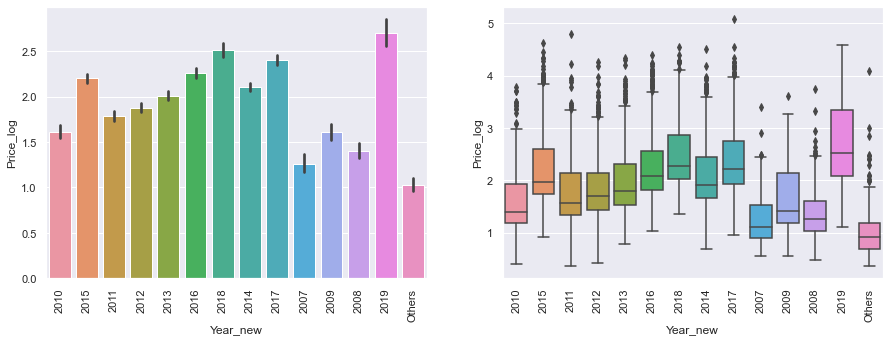

<IPython.core.display.Javascript object>

In [1136]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Price_log", x="Year_new")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price_log", x="Year_new")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. The price of used cars manufactured in 2019 is the highest. 
2. The price of the used cars manufactured between the years 2015-2018 are higher priced maybe due to the new versions of the cars.  


## How does the price vary across the various brands

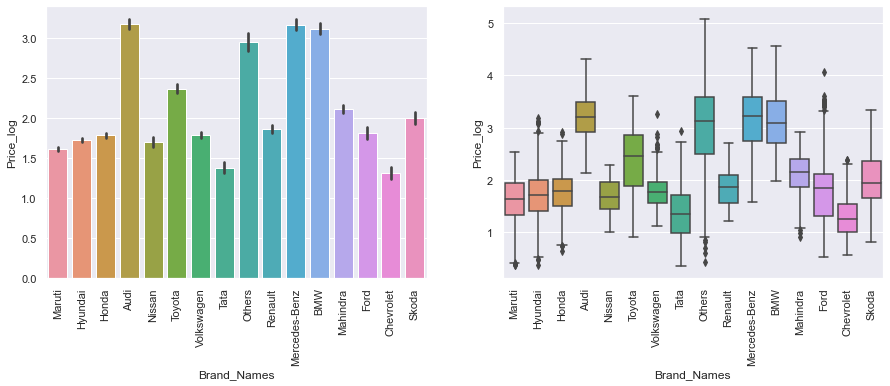

<IPython.core.display.Javascript object>

In [1137]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Price_log", x="Brand_Names")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price_log", x="Brand_Names")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Evident that Audi, Mercedes-benz and bmw are expensive and the used cars of these brands sell around the same highest prices.
2. Hyndai, Honda, Nissan, Volkswagen, Renault, Ford, Skoda which are all foriegn brands sell at similar higher prices.
3. Indian Brand like tata sells at less price. 

## How does the price vary with the various brands across Transmission

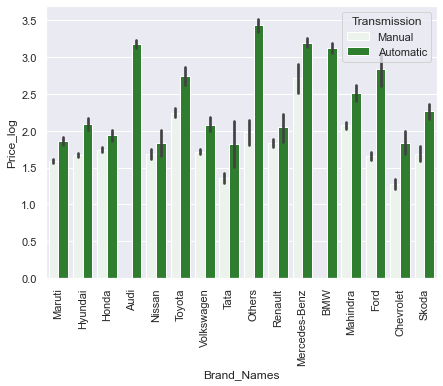

<IPython.core.display.Javascript object>

In [1138]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x="Brand_Names", y="Price_log", hue="Transmission", data=data, color="forestgreen"
)
plt.xticks(rotation=90)
plt.show()

**Observation**
1. Manual cars are less expensive than automatic cars
2. Tata Manual cars price is the least  
3. Chervolet price for automaic cars is the least
4. Maruti,Hyndai,Hinda,Nissan,Tata and chervrolet automatic cars are of similar pricing.
5. Maruti,Hyndai,Hinda,Nissan,volkswagen,Renault, ford , skoda sell similar range of manual cars

## Price vary with Owner type across Transmission

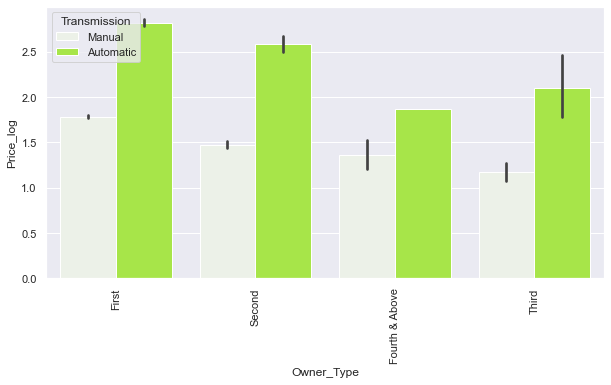

<IPython.core.display.Javascript object>

In [1139]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Owner_Type", y="Price_log",hue="Transmission", data=data,color="greenyellow")
plt.xticks(rotation=90)
plt.show()


**Observations**
1. First hand automatic cars are most expensive 

## Seats variation with brands 

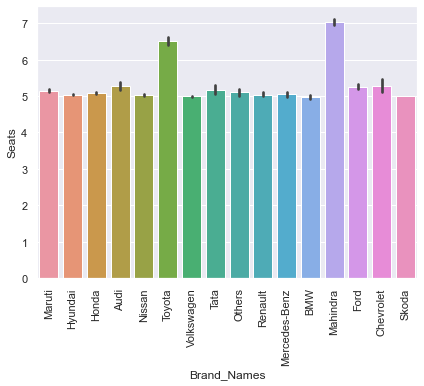

<IPython.core.display.Javascript object>

In [1140]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Seats", x="Brand_Names")
plt.xticks(rotation=90)


plt.show()

**Observations**
1. Mahindra and Toyota offer 6 and above seats for family.

## Engine variation with Fuel Types 

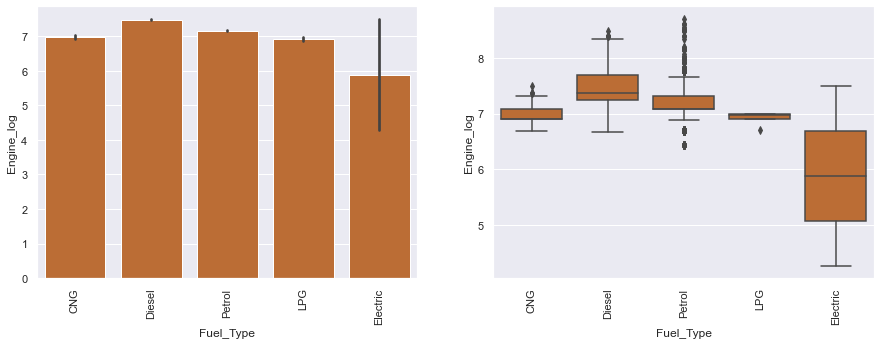

<IPython.core.display.Javascript object>

In [1141]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Engine_log", x="Fuel_Type", color="chocolate")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Engine_log", x="Fuel_Type", color="chocolate")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Electric cars have the least Engine Displacements
2. Diesel cars have the high Engine Displacements

## How does the Kilometers_Driven_log vary across the various Owner_Type

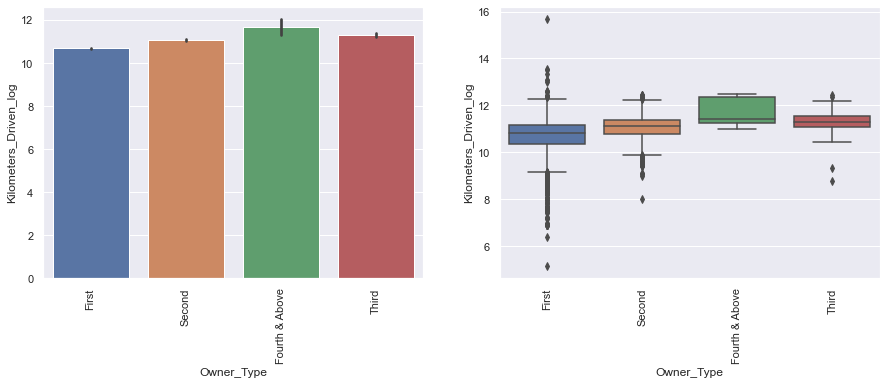

<IPython.core.display.Javascript object>

In [1142]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Kilometers_Driven_log", x="Owner_Type")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Kilometers_Driven_log", x="Owner_Type")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Four and above owners have most Kilometers_Driven.
2. Also even first hand owner cars have high kilometers driven.

## Mileage variation with fuel Type 

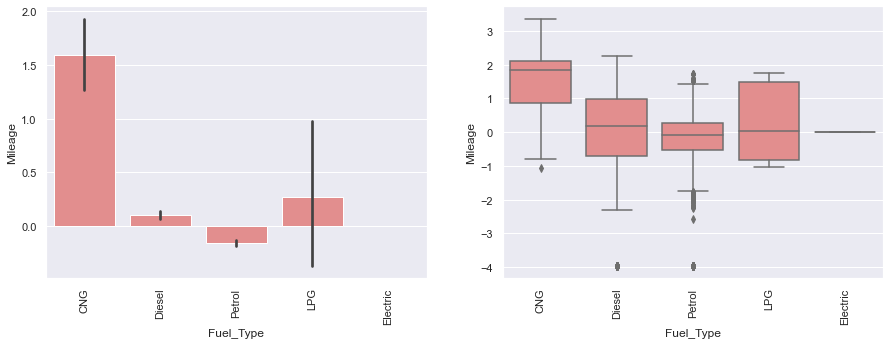

<IPython.core.display.Javascript object>

In [1143]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Mileage", x="Fuel_Type", color="lightcoral")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Mileage", x="Fuel_Type", color="lightcoral")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Mileage for CNG cars are the most followed by LPG
2. Diesel cars give more mileage than petrol cars

## Power variation with Brands across Transmission

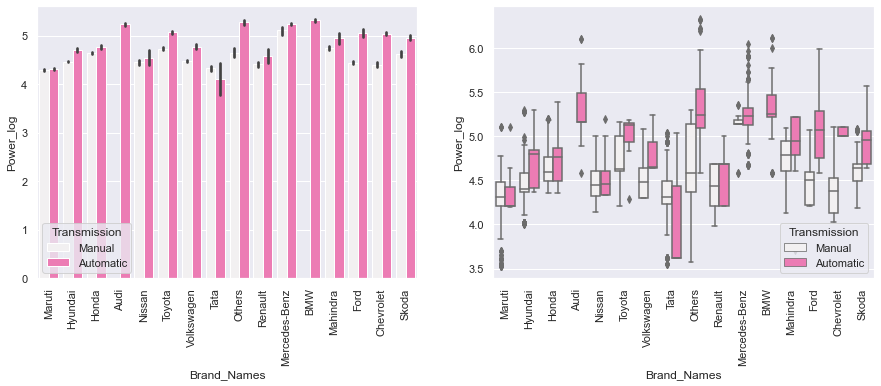

<IPython.core.display.Javascript object>

In [1144]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(
    data=data, y="Power_log", x="Brand_Names", hue="Transmission", color="hotpink"
)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(
    data=data, y="Power_log", x="Brand_Names", hue="Transmission", color="hotpink"
)
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Audi and BMW only automatic cars are availablewith highest power.
2. Power for Maruti,Nissan,Honda automatic and manual cars are similar.
3. Mostly automatic cars have more power than manual cars

# Maruti Hyundai Honda Toyota account to 54% in total of the most sold used cars market

In [1145]:
# Creating a separate dataframe of only the brands that are sold most
data_most_sold_cars = data[
    (data["Brand_Names"] == "Maruti")
    | (data["Brand_Names"] == "Hyundai")
    | (data["Brand_Names"] == "Honda")
    | (data["Brand_Names"] == "Toyota")
]

<IPython.core.display.Javascript object>

## How does Mileage vary across the most sold brands

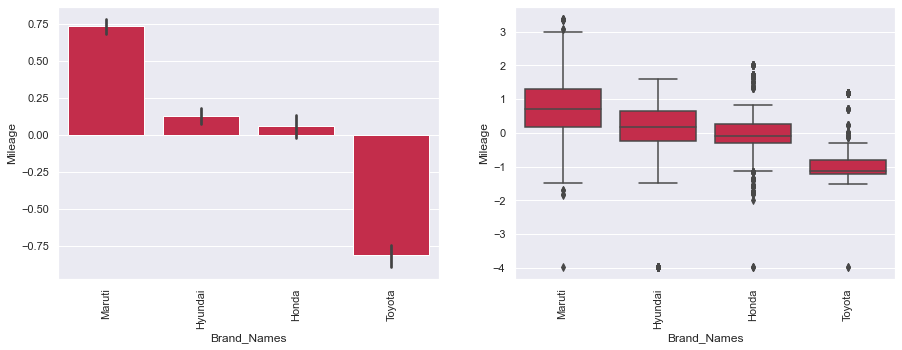

<IPython.core.display.Javascript object>

In [1146]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data_most_sold_cars, y="Mileage", x="Brand_Names", color="crimson")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_most_sold_cars, y="Mileage", x="Brand_Names", color="crimson")
plt.xticks(rotation=90)

plt.show()

**Observation**
1. Maruti has the highest mileage followed by Hyundai.<br>
 
 If customer focus more on fuel efficitemt high mileage cars maruti is the best option , hyundai and honda also can be categorised for fuel efficients can be recommended to customers seeking fuel effititent cars.


## How does the Price vary with the location of sales accross the 2 transmissions for the most sold used cars

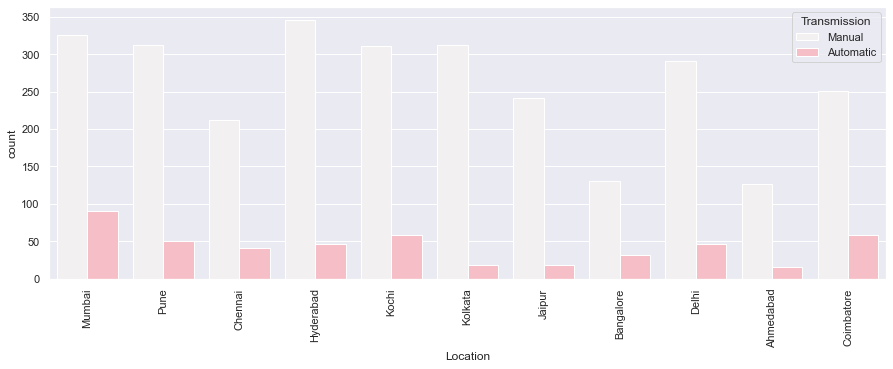

<IPython.core.display.Javascript object>

In [1147]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=data_most_sold_cars,
    #     y="Price_log",
    x="Location",
    hue="Transmission",
    color="lightpink",
)
plt.xticks(rotation=90)
plt.show()

**Observation**
1. Manual Cars<br>
   Mumbai , Hyderabad manual cars are the cities where most sold brands manual cars are available.


2. Automatic Cars<br>
   Mumbai is where most of the  sold brands automatic cars are available.
   Kochi and Coimbatore follows.
   
   
   it is recommened that -------- these cities hold inventory of automatic cars based on past sales history.

## How does the prce vary with Location accorss the Fuel Type

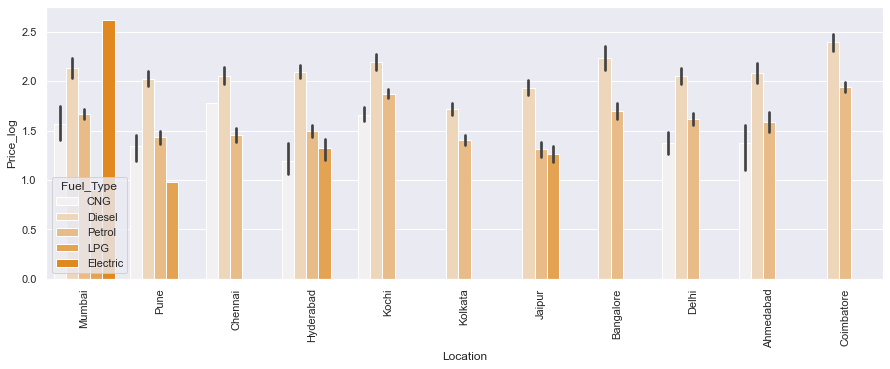

<IPython.core.display.Javascript object>

In [1148]:
plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
sns.barplot(
    data=data_most_sold_cars,
    y="Price_log",
    x="Location",
    hue="Fuel_Type",
    color="darkorange",
)
plt.xticks(rotation=90)
plt.show()

**Observation**
1. Electric cars are only available in Mumbai and it is the most expensive.
2. Diesel cars are more expensive than Petrol cars.

## How does the Kilometers driven log vary with owner type across the fuel type for most sold used cars

<Figure size 1080x360 with 0 Axes>

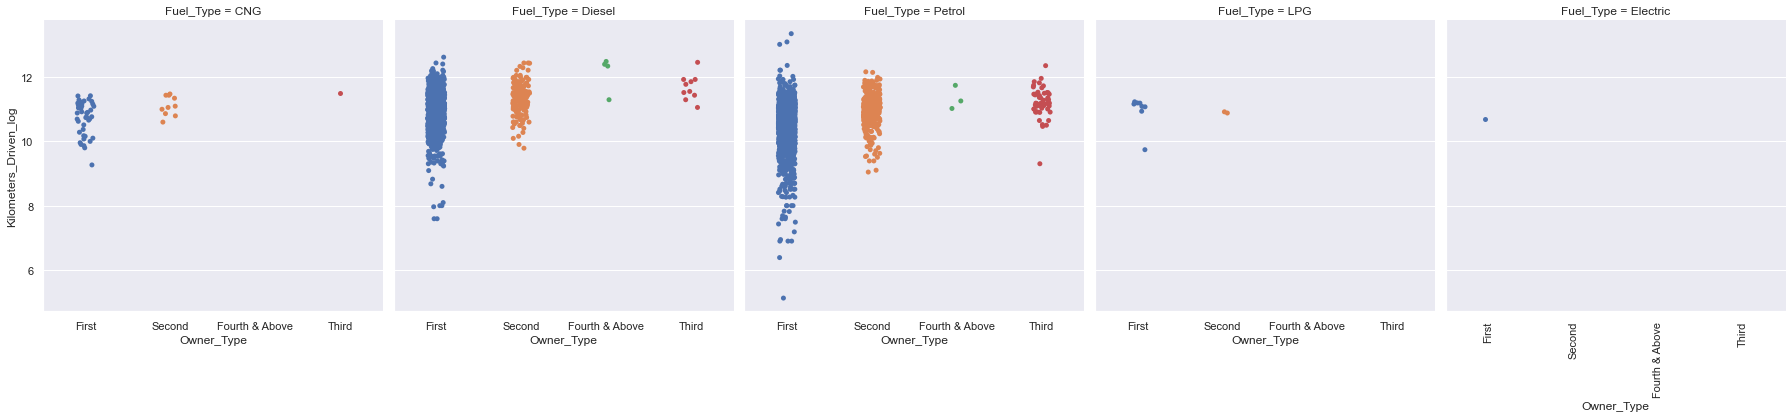

<IPython.core.display.Javascript object>

In [1149]:
plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
sns.catplot(
    data=data_most_sold_cars,
    y="Kilometers_Driven_log",
    x="Owner_Type",
    col="Fuel_Type",
)
plt.xticks(rotation=90)
plt.show()

1. Based on the data visualization it can we seen that the kilometer driven range  under the diesel engine variant is  relatively higher when comapred to petrol.
2. Inspite of higher kilometers driven of the used cars under diesel variant sales/availability of diesel used cars are more than petrol.<br>



 From the  count VS Fuel Types chart it was clear that diesel is sold/available in higher number than petrol.
Hence it is recommended that CAR4U targets diesel car sales to customers who prefers high fuel cost saving cars as long as customers are not highly concerned towards Kilometer driven.

## Price vary with Owner type across Transmission and Fuel Type for most sold used cars

<Figure size 1080x360 with 0 Axes>

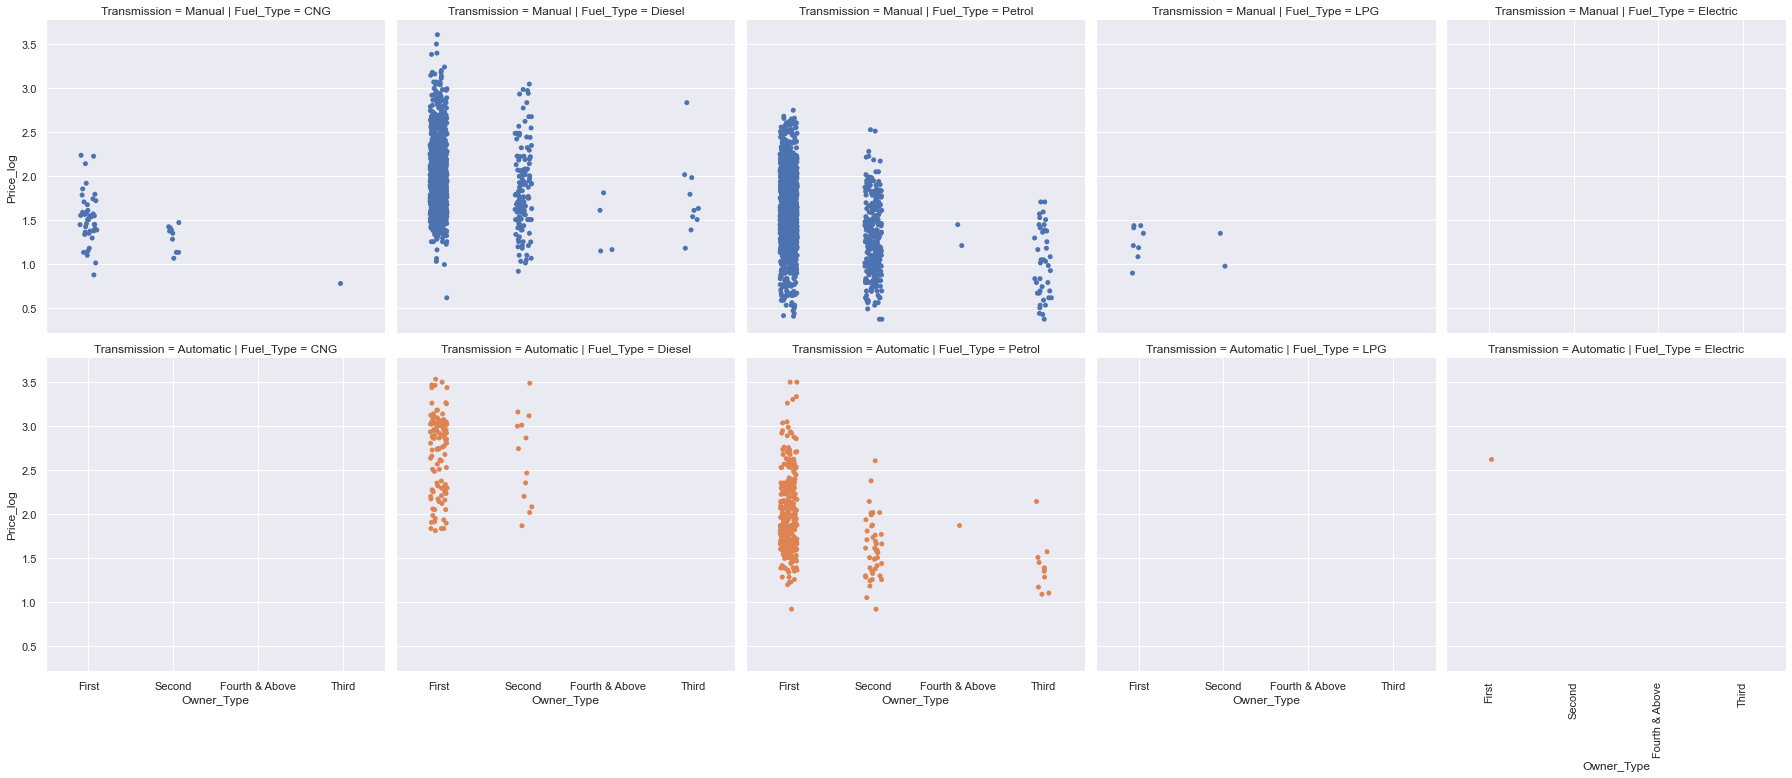

<IPython.core.display.Javascript object>

In [1150]:
plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
sns.catplot(
    data=data_most_sold_cars,
    y="Price_log",
    x="Owner_Type",
    row="Transmission",
    col="Fuel_Type",
    hue="Transmission",
)
plt.xticks(rotation=90)
plt.show()

**Observations**
1. the Price remains to be stable between the first and second owned diesel automatic cars.

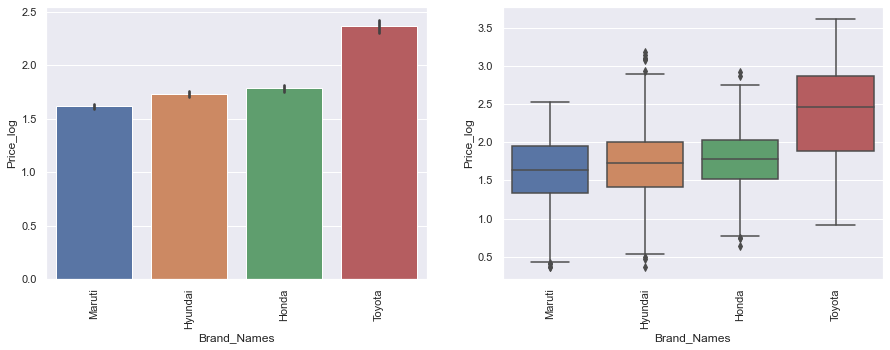

<IPython.core.display.Javascript object>

In [1151]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data_most_sold_cars, y="Price_log", x="Brand_Names")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_most_sold_cars, y="Price_log", x="Brand_Names")
plt.xticks(rotation=90)

plt.show()

## Power log vary with Brand names for most sold used cars

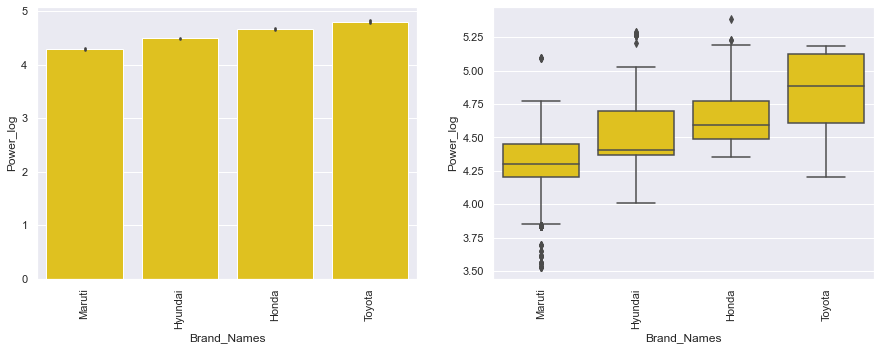

<IPython.core.display.Javascript object>

In [1152]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data_most_sold_cars, y="Power_log", x="Brand_Names", color="gold")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_most_sold_cars, y="Power_log", x="Brand_Names", color="gold")
plt.xticks(rotation=90)

plt.show()

**Observations**
1. Though Maruti is the most sold car, it has less power.
2. Toyota has most power when compared to all most sold cars.


## Engine log vary with Fuel type across Transmission  for most sold used cars

<Figure size 1080x360 with 0 Axes>

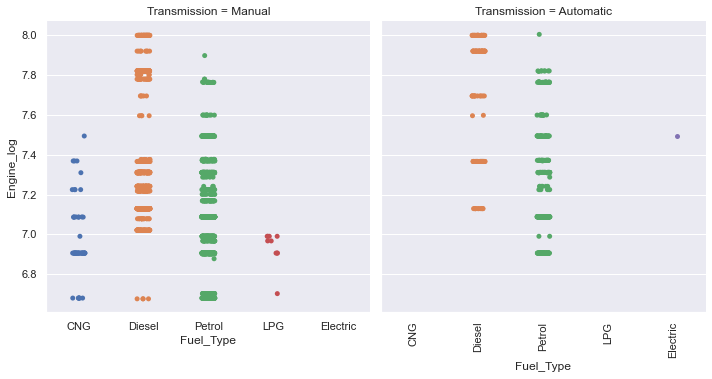

<IPython.core.display.Javascript object>

In [1153]:
plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
sns.catplot(
    data=data_most_sold_cars,
    y="Engine_log",
    x="Fuel_Type",
    col="Transmission",
)
plt.xticks(rotation=90)
plt.show()

**Observations**
1. The engine displacement in diesel automatic cars are at a  higher range than that of petrol automatic cars.

## Summary of EDA
### Data Description:

1. The target variable (Price) is of float type.
2. Columns like Name, Location, Year, fuel_Type,Transmission, Owner_Type, Mileage,Engine,Power etc. are of object type.
3. All other columns are numeric in nature.
4. There are no duplicate values in the data.
5. There are missing values in the data.

## Data Cleaning and Preprocessing:

1. The S.No column is dropped for modeling as it is same as index and not needed.<br>
2. The Mileage column was converted from string to numeric by applying the mileage_tonum function.<br>
3. The Engine column was converted from string to numeric by applying the engine_tonum function.<br>
4. The Power column was converted from string to numeric by applying the power_tonum function.<br>

**Missing Values**
1. Missing values in the target variable rating were dropped.<br>
2. Missing values in Engine were replaced with the median vales of Engine because of the distribution.<br>
3. Missing values in Mileage were replaced with the mean vales of Engine because of the distribution.<br>
4. Missing values in Power were replaced with the median vales of Power because of the distribution.<br>
5. Missing values in Seats were replaced with the mean vales of seats because of the distribution.<br>

**Z TRnasformation**
1. The Mileage column was tranformed with mean 0 and std 1 (Z Transformation) to understanding the data better from the mean.

**Log Transformation**
1. Because of the skewness the Engine power and kilometers driven columns were converted to log values for bringing all columns to a similar scale

**Data Extraction**
1. From the Name column the Brand name was extracted and threshold was set to mark the most frequent brands.
2. From the Year column the Year name was converted to string and threshold was set to mark the most frequent year.

**Outlier Analysis**
1. Decided to not take any values as outliers as all the data is providing some information.



## Observations from EDA:

**Numerical Columns**
1. Price: The Price Column right skewed distributed, with a mean rating of 9.47. 
2. Engine_log :  It was right skewed but after log transformation it was a little normally distrbuted.As Engine displacte increases the price increases.
3. Power_log : It was right skewed but after log transformation it was a normally distrbuted.
4. Mileage: After and before z transformation the distribution is normally distributed.
5. Seats: This distribution is normal with a mean of 5.
6. New_Price: Right skewed distribution with a mean of 21.

**After variable transformation**
1. Previously the Engine,Power were transformed to log values as enine_log and Power_log
2. Price and New_Price are now converted to Log values

**Categorical Columns**
1. Year : 1. 2014 is when most of the used cars about 13.2% were manufactured.
2. Location: 13% of cars are sold in Mumbai and 12.3% of used cars are sold in Hyderabad which are the cities where most number of cars are sold or available for purchase.
3. Fuel type :About more than half the number of used cars are of diesel Fuel Type.
4. Transmission:  About 70% of used cars are use Manual Transmission.
5. Owner_Type: It is interesting to note that almost 80% of used cars are of First owner type.
6. Brands : About 18%-20% of the used cars market consists of Hyundai or Maruti brands.

**Heat Maps**
1. Price is highly positively correlated with New_price, Power, Engine
2. Price is negatively correlated with Kilometers_driven and Mileage.

# Model Building

## Dependant and Independant Variables

In [1154]:
data_1 = data.copy()

<IPython.core.display.Javascript object>

In [1155]:
X = data_1.drop("Price_log", axis=1)
y = data_1["Price_log"]

<IPython.core.display.Javascript object>

## Converting categorical variables into numeric by creating dummies

In [1156]:
X = pd.get_dummies(
    X, columns=X.select_dtypes("object", "category").columns.to_list(), drop_first=True
)
X.head()

,Mileage,Seats,Engine_log,Power_log,Kilometers_Driven_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Names_BMW,Brand_Names_Chevrolet,Brand_Names_Ford,Brand_Names_Honda,Brand_Names_Hyundai,Brand_Names_Mahindra,Brand_Names_Maruti,Brand_Names_Mercedes-Benz,Brand_Names_Nissan,Brand_Names_Others,Brand_Names_Renault,Brand_Names_Skoda,Brand_Names_Tata,Brand_Names_Toyota,Brand_Names_Volkswagen,Year_new_2008,Year_new_2009,Year_new_2010,Year_new_2011,Year_new_2012,Year_new_2013,Year_new_2014,Year_new_2015,Year_new_2016,Year_new_2017,Year_new_2018,Year_new_2019,Year_new_Others
0,1.847799,5.0,6.905753,4.063198,11.184421,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.335077,5.0,7.366445,4.837868,10.621327,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.014197,5.0,7.089243,4.485260,10.736397,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.575192,7.0,7.129298,4.485936,11.373663,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.640661,5.0,7.584773,4.947340,10.613246,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Spliting the data into train and test

In [1157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [1158]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_test.shape[0])

4213
52
1806


<IPython.core.display.Javascript object>

## Fitting the Linear Regression Model

In [1159]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

## Getting the coefficients and intercepts

In [1160]:
coeffient_intercets = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=X_train.columns.to_list() + ["Intercept"],
    columns=["Coefficients"],
)

coeffient_intercets

,Coefficients
Mileage,-0.035263
Seats,0.000105
Engine_log,0.170726
Power_log,0.487560
Kilometers_Driven_log,-0.093614
New_Price_log,0.371381
Location_Bangalore,0.144217
Location_Chennai,0.044919
Location_Coimbatore,0.129841
Location_Delhi,-0.053400


<IPython.core.display.Javascript object>

## Coefficient Interpretations

#### Positive Coefficients
1. Seats
2. Engine_log
3. Power_log
4. New_Price
5. Few Locations
6. Most Year of manufacturing coefficients
7. Few of Brands_Names
8. Few Fuel_types coefficients

**Increase in these will lead to an increase in the price of the used cars.**
#### Negative Coefficients
1. Few Year of manufacturing coefficients
2. Most brand_names
3. Transmission Manual
4. Fuel Type petrol
5. Most of the Location Coefficients
6. Kilometers Driven
7. Mileage


**Increase in these will lead to a decrease in the price of the used cars.**


## Model Performance

In [1161]:
# function to get the adjusted r squared value
def adjusted_r_squared(predictors, targets, predictions):
    r_squared = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

<IPython.core.display.Javascript object>

In [1162]:
# function to get the mean_absolute_percenatge_error value
def mean_absolute_percenatge_error(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

<IPython.core.display.Javascript object>

In [1163]:
# function to see the various performance measures
def model_performance_measures(model,predictors,targets):
    '''
    Function return a dataframe with the performance measures of the Linear Model
    model:Linear regression model
    predictors-independent
    targets-dependent
    
    '''
    # predicting using the independent variables
    pred_yhat = model.predict(predictors)
    
    r2 = r2_score(targets,pred_yhat) # To compute r-squared
    adjr2= adjusted_r_squared(predictors,targets,pred_yhat)# To compute adjusted r squared
    rmse = np.sqrt(mean_squared_error(targets,pred_yhat))# To compute RMSE
    mae= mean_absolute_error(targets,pred_yhat)# To compute MAE
    mape = mean_absolute_percenatge_error(targets,pred_yhat)# To compute MAPE
    
    # creating a dataframe of all calculated metrics
    prediction_dataframe=pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },index=[0]
        
    )
    
    return prediction_dataframe


<IPython.core.display.Javascript object>

## Perfromance on Train Data

In [1164]:
# checking model performance on Train data
print("Training Data Model performance")
model_training_performance = model_performance_measures(model, X_train, y_train)
model_training_performance

Training Data Model performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.191965,0.137798,0.933798,0.932971,7.97437


<IPython.core.display.Javascript object>

## Performance on Test Data

In [1165]:
# checking model performance on Test data
print("Testing Data Model Performance")
model_testing_performance = model_performance_measures(model, X_test, y_test)
model_testing_performance

Testing Data Model Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.178122,0.132707,0.94398,0.942318,7.70025


<IPython.core.display.Javascript object>

## Observations

1. The train and test  𝑅2  are 0.93 and 0.94, indicating that the model explains 93% and 94% of the total variation in the train and test sets respectively. Also, both scores are comparable.

2. RMSE values on the train and test sets are also comparable.

3. This shows that the model is not overfitting.

4. MAE indicates that our current model is able to predict Price within a mean error of 0.13 on the test set.

5. MAPE of 7.70 on the test data means that we are able to predict within ~8% of the Prices of used cars.

6. The overall performance is much better than the model we built with Normal Price column without taking the Log 
R_squared is 0.74 for train data and for test data R_squared is 0.78

7. The overall performance is also much better than the model where we treated seat as a categorical variable

## Conclusions
1. We have been able to build a predictive model that can be used by CAR4U to predict the Prices of used cars with an 𝑅2 of 0.93 on the training set.
2. Cars4u can use this model to predict the prices of used cars within a mean error of 0.13 on the test set.

3. 
**Increasing effect of price of used cars**<br>
We found that positive coefficients of certain features like 
Seats,
Engine_log,
Power_log,
New_Price,
Few Locations,
Most Year of manufacturing coefficients,
Few of Brands_Names and
Few Fuel_types coefficients <br>
are some of the factors which tend to increase the prices of used cars.<br>


**Decreasing effect of price of used cars**<br>
We found that negative coefficients of certai features like 
Few Year of manufacturing coefficients,
Most brand_names,
Transmission Manual,
Fuel Type petrol,
Most of the Location Coefficients,
Kilometers Driven and
Mileage <br>
are some of the factors which tend to decrease the Prices of used cars.


4. We improved our linear regression model performance by applying non-linear transformations to some of the attributes.

5. Cars4U can also explore non-linear models, which might be able to better identify the patterns in the data to predict the Prices of used cars with even higher accuracy.

## INSIGHTS AND RECOMMENDATIONS FOR THE BUSINESS

The folowwing point have to be kept in place for better sales for our CARS4U company

**Based on Most Sold brands for increasing sales and revenue**
1. Almost 54% of sales are of brands Maruti,Huyndai,Honda and Toyota.
2. These cars can are mostly sold/available in Mumbai and Hyderabad.
3. It is recommened that Mumbai and Hyderabad  cities hold inventory of automatic cars based on past sales history.
3. If customer focus is more on fuel efficient high mileage cars maruti is the best option , hyundai and honda also can be categorised for fuel efficiency and  can be recommended to customers seeking fuel efficient cars.
1. Electric cars are only available in Mumbai and it recommended to only concentrate on this city for electric cars and slowly only penetrate into the metropolitan cities.
2. Diesel cars are more expensive than Petrol cars.
7. From the  count VS Fuel Types chart it was clear that diesel used cars are sold/available in higher number than petrol.Hence it is recommended that CAR4U targets diesel car sales to customers who prefers high fuel cost saving cars as long as customers are not highly concerned towards Kilometer driven.
8. For Diesel Automatic cars the first and second owned types are of similar stable pricing.
9. Though Maruti is the most sold car, it has less power.Toyota has most power when compared to all most sold cars.
Hence it is better to sell customers TOYOTA whose concentration is mostly on power and not on cost and vice versa to sell Maruti or Hyundai.
10. Since engine displacement in disel automatic cars are more higher than petrol automatic cars.This point can be taken into consideration while selling automatic cars.
11. SInce Maruti is the Mileage friendly car it can be more projected in all the city location taht it is cheap and very efficient.

**General Recommendations**
12. More marketing can be done in the second set of cities like Pune,Delhi,Ahmedabad,Jaipur,Chennai,Kolkata. given to 
13. Good deals of sale price can be given to the second set of cities like Pune,Delhi,Ahmedabad,Jaipur,Chennai,Kolkata.
13. Since TATA indian brand is the most cheapest it can be marketed in the upcoming urban locations in the counrty where they are upcoming.
15. Chervorlet has the cheapest automatic cars these can be marketed more in cosmopolitan cities like Chennai, Kolkata,Pune.
16. For the Family people Toyota and mahindra are the best options. It an be marketed with commercial of a family using it  via Huge bill boards where family audience can see in all the locations.
17. Most expensive cars like Audi, Benz, and BMW can bring more revenue. Hence people who have the mindset of high power cars having no problem wiht the price can be targeted.